In [75]:
import pandas as pd
import glob
import re
import nltk
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [76]:
all_files = glob.glob('Bigdata_dataset/myCabinetExcelData*.xls')
all_files #출력하여 내용 확인

['Bigdata_dataset\\myCabinetExcelData (1).xls',
 'Bigdata_dataset\\myCabinetExcelData (2).xls',
 'Bigdata_dataset\\myCabinetExcelData (3).xls',
 'Bigdata_dataset\\myCabinetExcelData (4).xls',
 'Bigdata_dataset\\myCabinetExcelData (5).xls',
 'Bigdata_dataset\\myCabinetExcelData (6).xls',
 'Bigdata_dataset\\myCabinetExcelData (7).xls',
 'Bigdata_dataset\\myCabinetExcelData (8).xls',
 'Bigdata_dataset\\myCabinetExcelData (9).xls',
 'Bigdata_dataset\\myCabinetExcelData.xls']

In [77]:
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Moth-Flame Optimization-Bat Optimization: Map-...,"Ravuri, Vasavi; Vasundra, S.",Mary Ann Leibert,2020
1,NaN,2,"Big Data, Little Data, and Care Coordination f...",unknown,Mary Ann Leibert,2015
2,NaN,3,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
3,NaN,4,Remotely sensed big data for the oceans and po...,"Li, Xiao-Ming",John Wiley & Sons Ltd,2022
4,NaN,5,"Big Data, Efficient Markets, and the End of Da...","Urbaczewski, Andrew; Elmore, Ryan",Mary Ann Leibert,2018
...,...,...,...,...,...,...
95,NaN,96,A Multi-Branch Decoder Network Approach to Ada...,"Zhang, Yang",unknown,2022
96,NaN,97,Memory Scaling of Cloud-Based Big Data Systems...,"Wang, Xinying",unknown,2022
97,NaN,98,Towards quality-of-service driven consistency ...,"García-Recuero, Álvaro; Esteves, Sérgio; Veiga...",Inderscience,2014
98,NaN,99,Fast approaches for semantic service compositi...,"Huang, Jun; Zhou, Yide; Duan, Qiang; Xing, Con...",Inderscience,2019


In [78]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True) 
#all_files_data_concat

In [79]:
all_files_data_concat.to_csv('Bigdata_dataset/riss_bigdata.csv', encoding = 'utf-8-sig', index = False)

In [80]:
# 데이터 조합: 10개 파일에 있는 1000개 데이터를 하나의 파일로 병합
all_files = glob.glob('Bigdata_dataset/myCabinetExcelData*.xls')
all_files

['Bigdata_dataset\\myCabinetExcelData (1).xls',
 'Bigdata_dataset\\myCabinetExcelData (2).xls',
 'Bigdata_dataset\\myCabinetExcelData (3).xls',
 'Bigdata_dataset\\myCabinetExcelData (4).xls',
 'Bigdata_dataset\\myCabinetExcelData (5).xls',
 'Bigdata_dataset\\myCabinetExcelData (6).xls',
 'Bigdata_dataset\\myCabinetExcelData (7).xls',
 'Bigdata_dataset\\myCabinetExcelData (8).xls',
 'Bigdata_dataset\\myCabinetExcelData (9).xls',
 'Bigdata_dataset\\myCabinetExcelData.xls']

In [81]:
# 파일을 하나씩 읽어 하나의 데이터프레임으로 병합하고 csv 파일에 저장
all_files_data = [] #전체 데이터를 저장할 리스트
for file in all_files: 
    data_frame = pd.read_excel(file) 
    all_files_data.append(data_frame) 
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Moth-Flame Optimization-Bat Optimization: Map-...,"Ravuri, Vasavi; Vasundra, S.",Mary Ann Leibert,2020
1,NaN,2,"Big Data, Little Data, and Care Coordination f...",unknown,Mary Ann Leibert,2015
2,NaN,3,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
3,NaN,4,Remotely sensed big data for the oceans and po...,"Li, Xiao-Ming",John Wiley & Sons Ltd,2022
4,NaN,5,"Big Data, Efficient Markets, and the End of Da...","Urbaczewski, Andrew; Elmore, Ryan",Mary Ann Leibert,2018
...,...,...,...,...,...,...
95,NaN,96,A Multi-Branch Decoder Network Approach to Ada...,"Zhang, Yang",unknown,2022
96,NaN,97,Memory Scaling of Cloud-Based Big Data Systems...,"Wang, Xinying",unknown,2022
97,NaN,98,Towards quality-of-service driven consistency ...,"García-Recuero, Álvaro; Esteves, Sérgio; Veiga...",Inderscience,2014
98,NaN,99,Fast approaches for semantic service compositi...,"Huang, Jun; Zhou, Yide; Duan, Qiang; Xing, Con...",Inderscience,2019


In [82]:
# 데이터 전처리 : 수집 데이터에서 제목을 추출하여 전처리
all_title = all_files_data_concat['제목']
all_title

0      Moth-Flame Optimization-Bat Optimization: Map-...
1      Big Data, Little Data, and Care Coordination f...
2                                Why Big Data = Big Deal
3      Remotely sensed big data for the oceans and po...
4      Big Data, Efficient Markets, and the End of Da...
                             ...                        
995    A Multi-Branch Decoder Network Approach to Ada...
996    Memory Scaling of Cloud-Based Big Data Systems...
997    Towards quality-of-service driven consistency ...
998    Fast approaches for semantic service compositi...
999    A five-layer architecture for big data process...
Name: 제목, Length: 1000, dtype: object

In [83]:
!pip install xlrd

In [84]:
stopWords=set(stopwords.words("english")) #영어 불용어를 불러와서 저장
lemma=WordNetLemmatizer()

In [85]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z] + "," ",str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [86]:
# 2차원 리스트를 1차원 리스트로
words2 = list(reduce(lambda x, y : x + y, words))
print(words2)

['moth-flame', 'optimization-bat', 'optimization', ':', 'map-reduce', 'framework', 'big', 'data', 'clustering', 'using', 'moth-flame', 'bat', 'optimization', 'sparse', 'fuzzy', 'c-means', 'big', 'data', ',', 'little', 'data', ',', 'care', 'coordination', 'medicare', 'beneficiary', 'medigap', 'coverage', 'big', 'data', '=', 'big', 'deal', 'remotely', 'sensed', 'big', 'data', 'ocean', 'polar', 'region', 'big', 'data', ',', 'efficient', 'market', ',', 'end', 'daily', 'fantasy', 'sport', 'know', '?', 'big', 'data', 'support', 'sustainable', 'development', 'goal', ':', 'celebration', 'establishment', 'international', 'research', 'center', 'big', 'data', 'sustainable', 'development', 'goal', '(', 'cbas', ')', 'big', 'data', 'drive', 'development', 'earth', 'science', 'big', 'data', 'healthcare', ':', 'opportunity', 'challenge', 'big', 'data', 'literature', 'search', 'ensemble-based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework', 'call', 'special', 'is

In [87]:
# 단어 빈도 구하기
count = Counter(words2)
count

Counter({'moth-flame': 4,
         'optimization-bat': 2,
         'optimization': 20,
         ':': 520,
         'map-reduce': 2,
         'framework': 41,
         'big': 966,
         'data': 1022,
         'clustering': 17,
         'using': 60,
         'bat': 2,
         'sparse': 4,
         'fuzzy': 8,
         'c-means': 2,
         ',': 248,
         'little': 18,
         'care': 13,
         'coordination': 2,
         'medicare': 2,
         'beneficiary': 2,
         'medigap': 2,
         'coverage': 2,
         '=': 2,
         'deal': 8,
         'remotely': 2,
         'sensed': 2,
         'ocean': 4,
         'polar': 2,
         'region': 4,
         'efficient': 26,
         'market': 13,
         'end': 3,
         'daily': 2,
         'fantasy': 2,
         'sport': 3,
         'know': 2,
         '?': 79,
         'support': 11,
         'sustainable': 17,
         'development': 19,
         'goal': 12,
         'celebration': 2,
         'establishment': 3,


In [88]:
# 출현 횟수가 많은 상위 50개 단어 추출
word_count=dict()
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag]=counts
        print("{} : {}.format(tag, counts)")

{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, counts)
{} : {}.format(tag, 

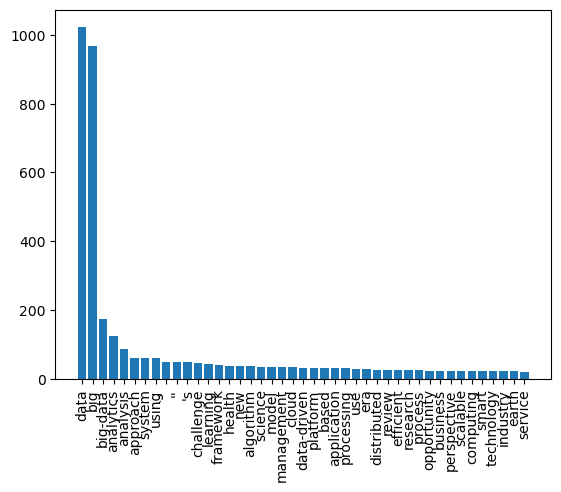

In [89]:
# 단어 빈도 탐색 : 히스토그램 그리기
plt.bar(range(len(word_count)), word_count.values(), align='center')
plt.xticks(range(len(word_count)), word_count.keys(), rotation='vertical')
plt.show()

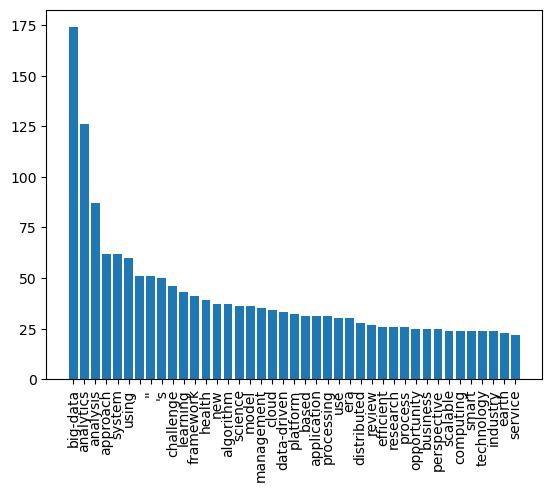

In [90]:
del word_count['big']
del word_count['data']
plt.bar(range(len(word_count)), word_count.values(), align='center')
plt.xticks(range(len(word_count)), word_count.keys(), rotation='vertical')
plt.show()

In [91]:
# 결과 시각화 : 연도별 big bata 관련된 학술문서 수를 추출하여 그래프 그리기
all_files_data_concat['doc_count']=0
summary_year=all_files_data_concat.groupby('출판일',as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,2003,1
1,2004,2
2,2011,6
3,2012,21
4,2013,51
5,2014,128
6,2015,100
7,2016,130
8,2017,132
9,2018,131


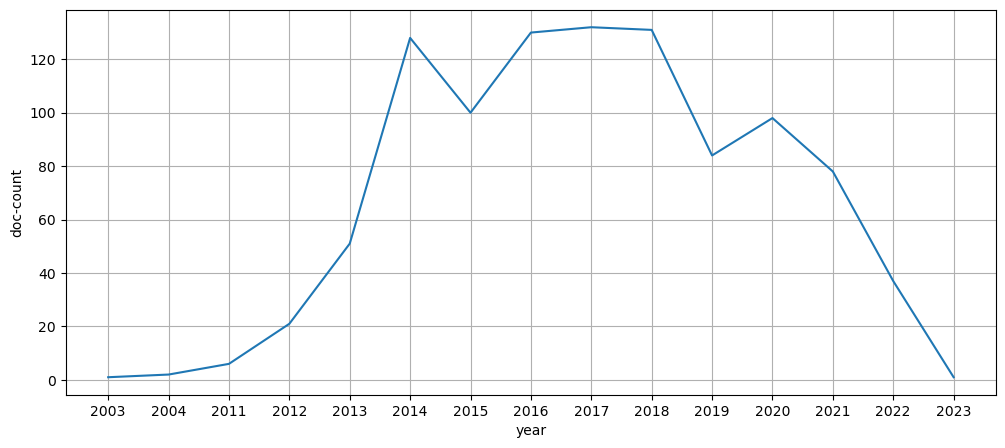

In [92]:
plt.figure(figsize=(12, 5))
plt.xlabel('year')
plt.ylabel('doc-count')
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), summary_year['출판일'])
plt.show()

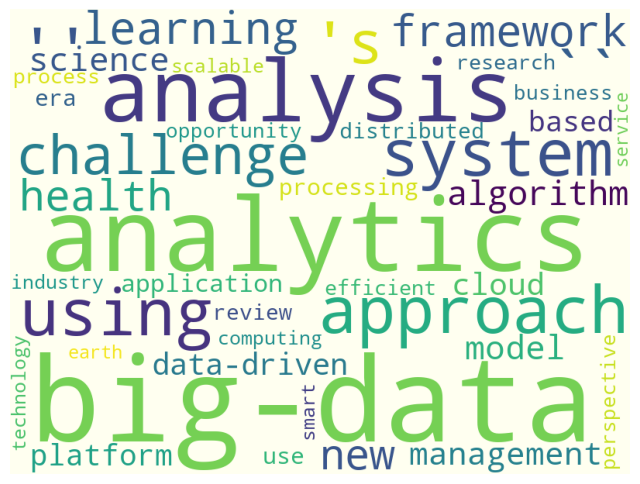

In [93]:
# 결과 시각화 : 워드클라우드 그리기
stopWords=set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [95]:
cloud.to_file("./Desktop/riss_bigdata_wordCloud.jpg")